### Using Tf-idf and LDA for Topic Modeling

I wanted to implement simple text feature extraction and topic modeling to identify the top topics in state of the union addresses. For now, the output is a series of word clouds but it would be interesting to see how these topics' prevalence rise and fall over time. 

In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

from random import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [2]:
# import data
df = pd.read_pickle('data/clean_speech_approvals.pkl')
df.set_index('president', inplace=True)

In [3]:
sotu_corpus = list(df.speech)

In [4]:
no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(sotu_corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [5]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(sotu_corpus)
tf_feature_names = tf_vectorizer.get_feature_names()

In [6]:
no_topics = 6

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [7]:
# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, 
                                max_iter=5, learning_method='online', learning_offset=50.,
                                random_state=0).fit(tf)

In [8]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [12]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        data = ' '.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        title = 'Topic {}'.format(topic_idx+1)
        show_wordcloud(data, title)        

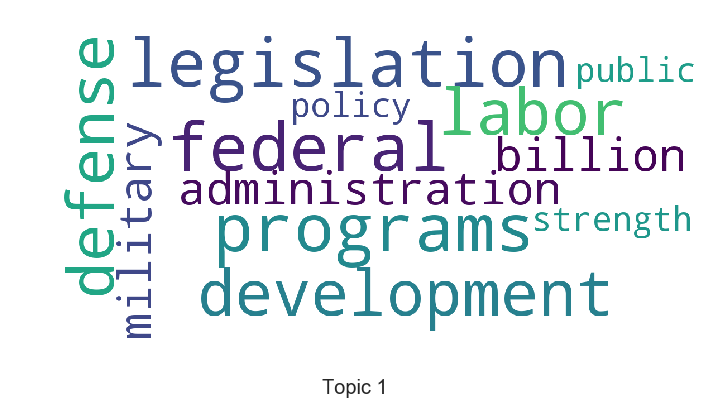

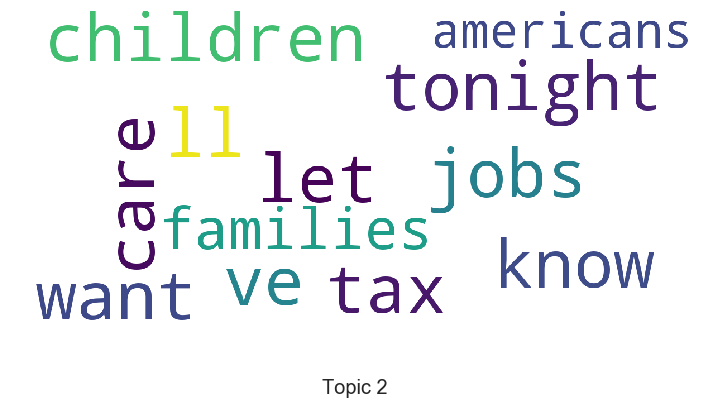

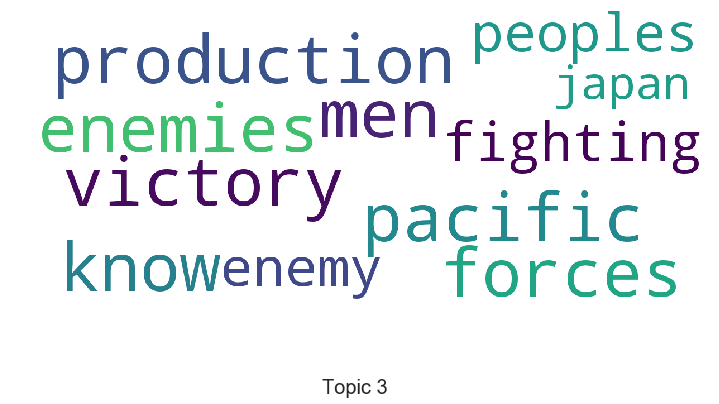

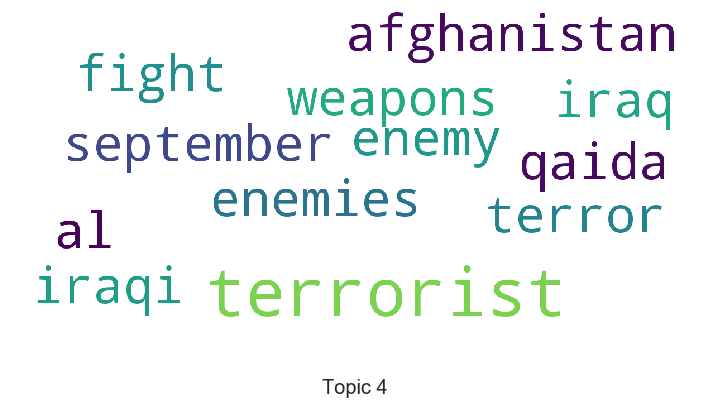

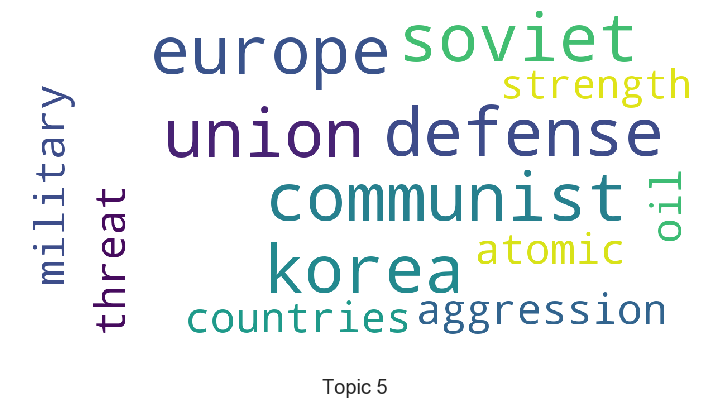

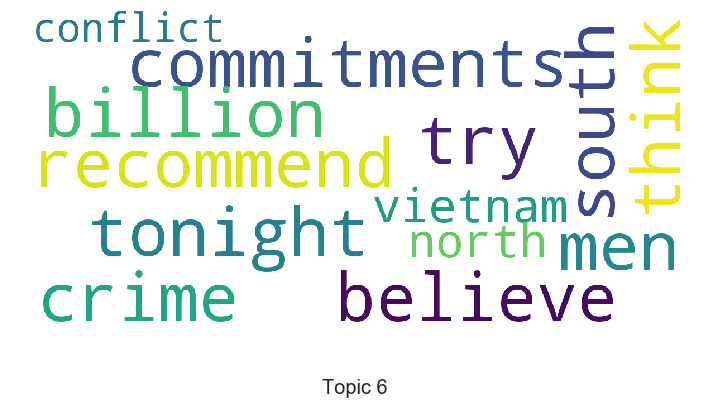

In [15]:
no_top_words = 13
display_topics(nmf, tfidf_feature_names, no_top_words)

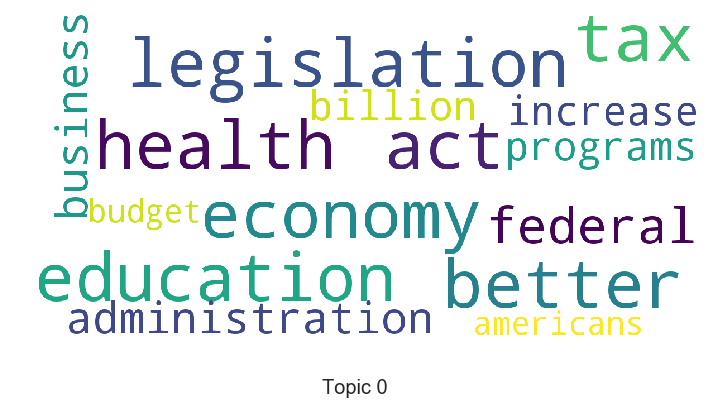

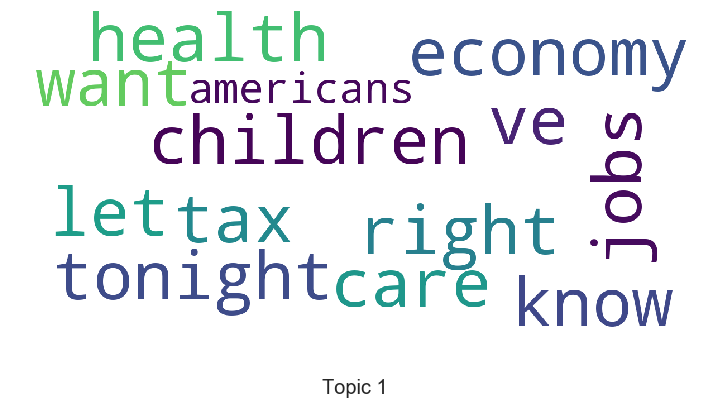

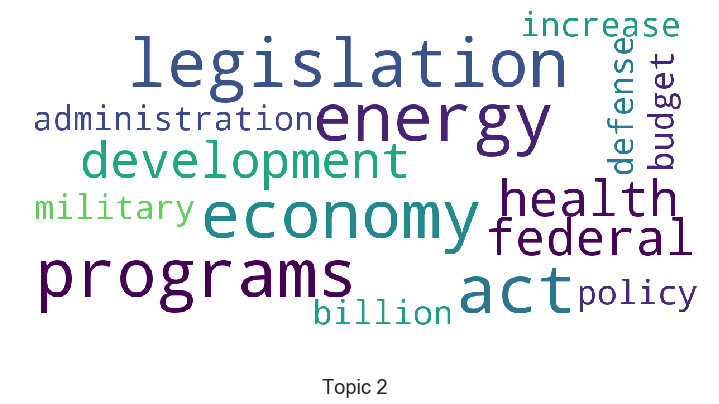

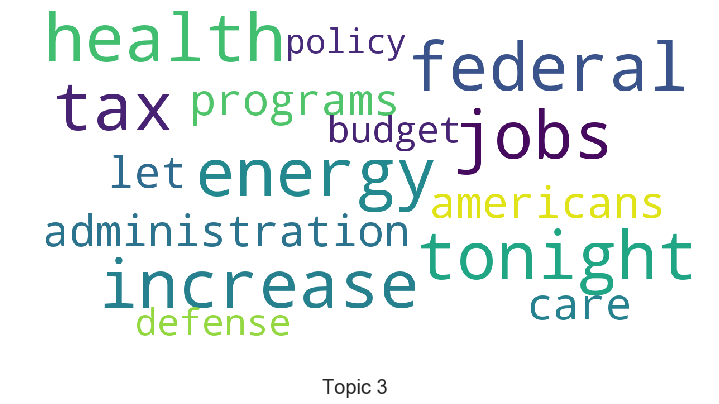

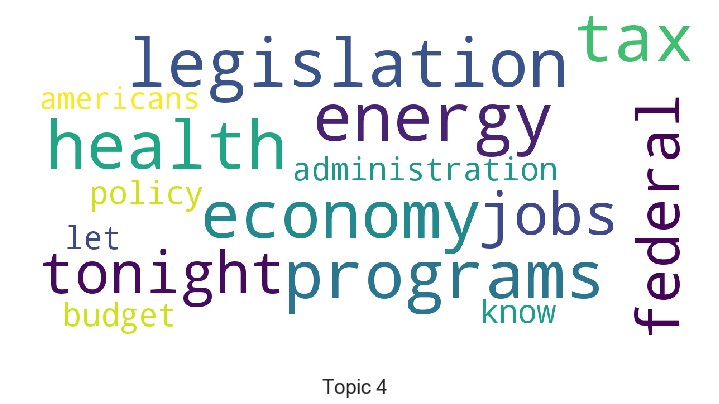

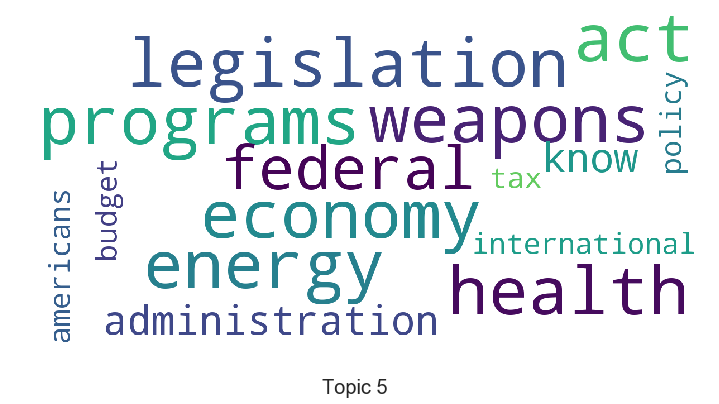

In [11]:
display_topics(lda, tf_feature_names, no_top_words)